In [1]:
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade

In [39]:
!pip3 install xgboost --upgrade

     |████████████████████████████████| 173.6 MB 4.0 kB/s             


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

### 1. Exploring the data (EDA)

In [5]:
uni_df = pd.read_csv('datasets/university_admission.csv')

In [6]:
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_Score            1000 non-null   int64  
 1   TOEFL_Score          1000 non-null   int64  
 2   University_Rating    1000 non-null   int64  
 3   SOP                  1000 non-null   float64
 4   LOR                  1000 non-null   float64
 5   CGPA                 1000 non-null   float64
 6   Research             1000 non-null   int64  
 7   Chance_of_Admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [11]:
uni_df.shape

(1000, 8)

In [12]:
uni_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


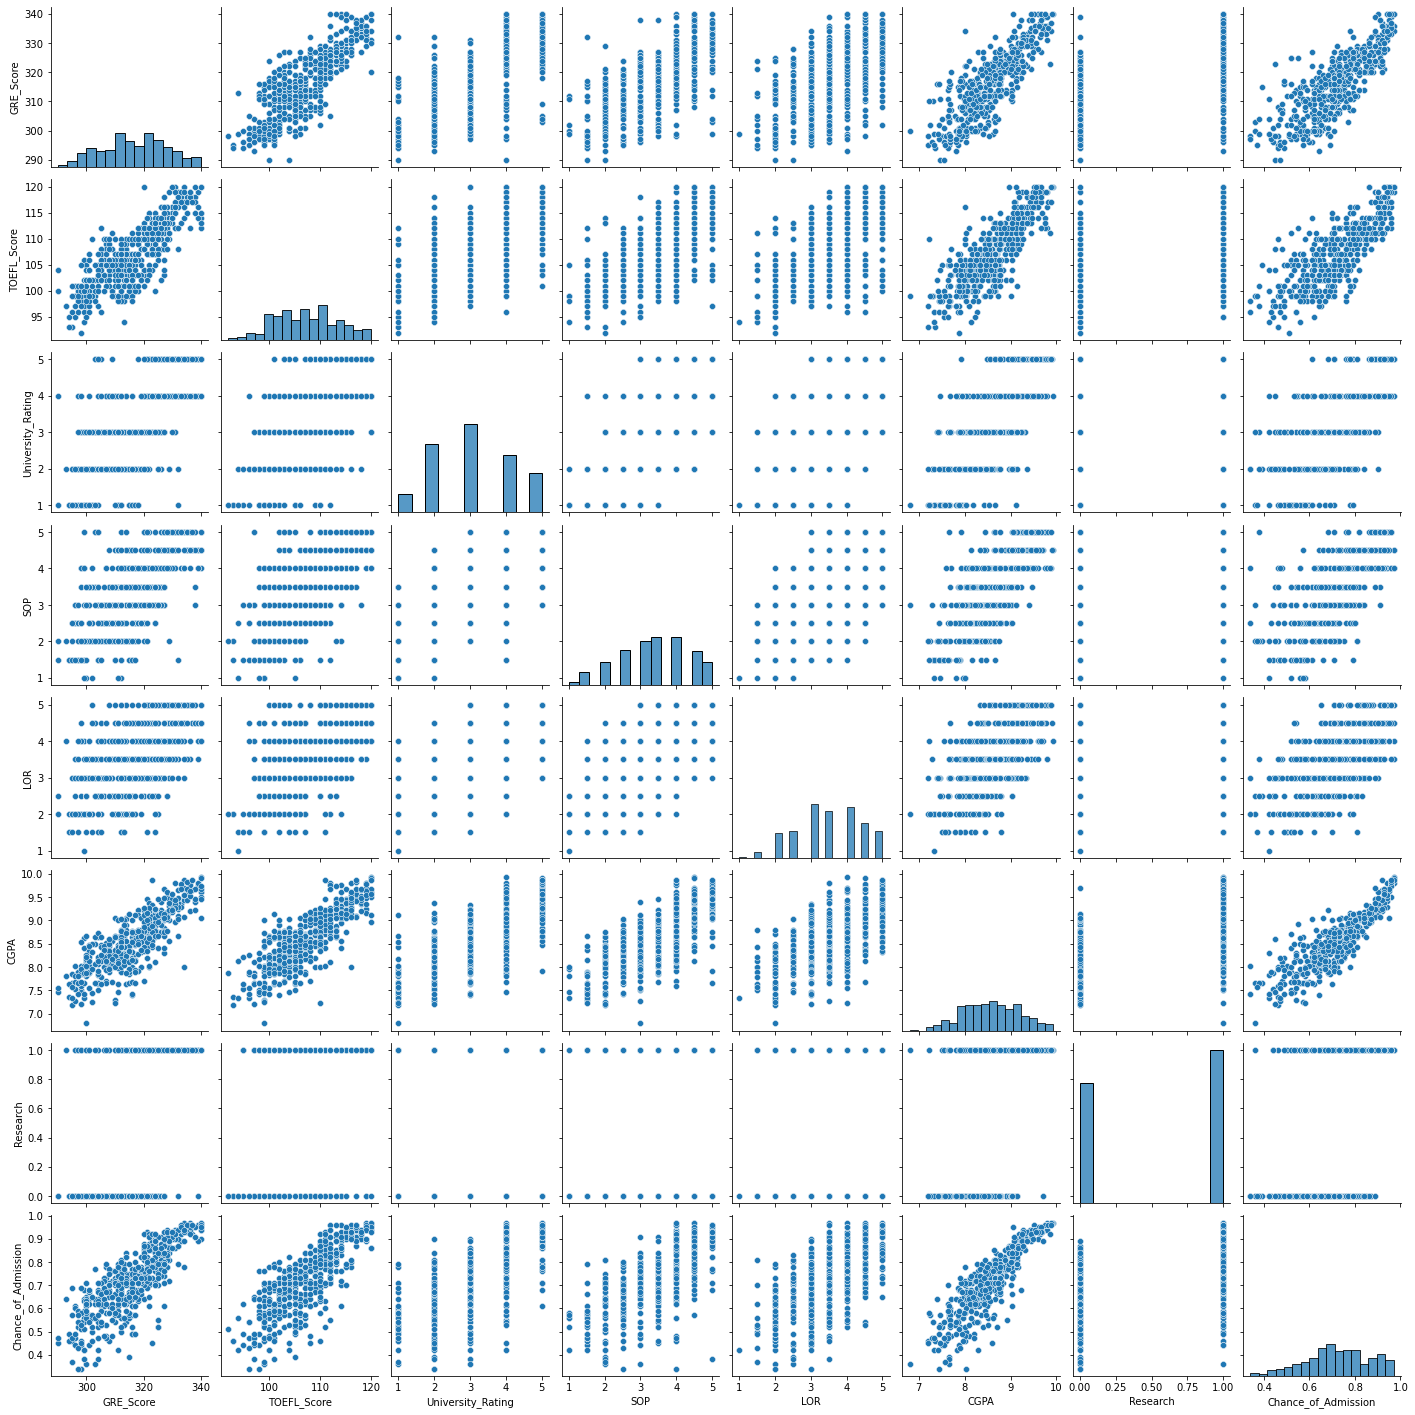

In [7]:
sns.pairplot(uni_df) 

array([[<AxesSubplot:title={'center':'GRE_Score'}>,
        <AxesSubplot:title={'center':'TOEFL_Score'}>,
        <AxesSubplot:title={'center':'University_Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance_of_Admission'}>,
        <AxesSubplot:>]], dtype=object)

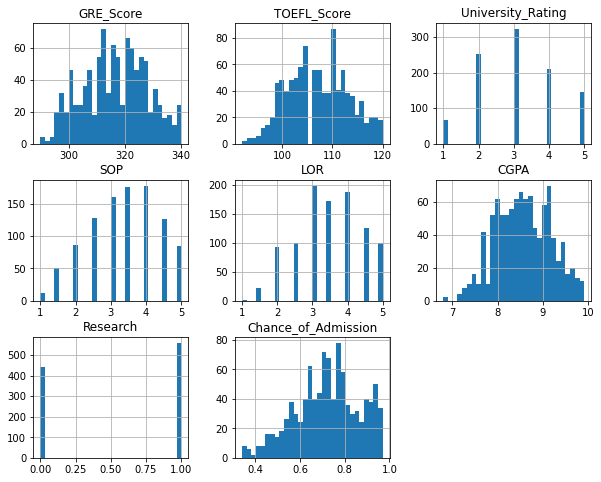

In [18]:
uni_df.hist(bins=30, figsize=(10,8))

<AxesSubplot:xlabel='SOP', ylabel='count'>

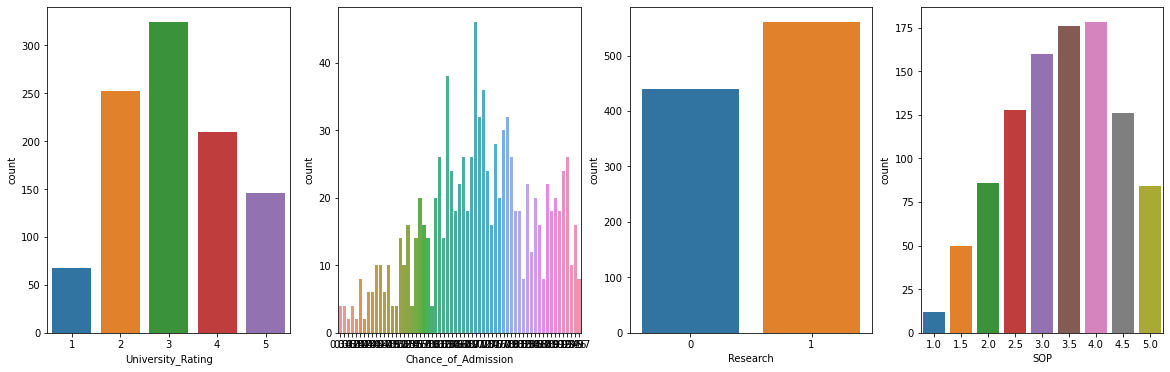

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))
sns.countplot(x = uni_df['University_Rating'], ax=ax1)
sns.countplot(x = uni_df['Chance_of_Admission'], ax=ax2)
sns.countplot(x = uni_df['Research'], ax=ax3)
sns.countplot(x = uni_df['SOP'], ax=ax4)

In [9]:
uni_df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
GRE_Score,1.000000,0.827076,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827076,1.000000,0.649725,0.644374,0.541340,0.810644,0.466453,0.791921
University_Rating,0.635376,0.649725,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644374,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541340,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810644,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.466453,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admission,0.810351,0.791921,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

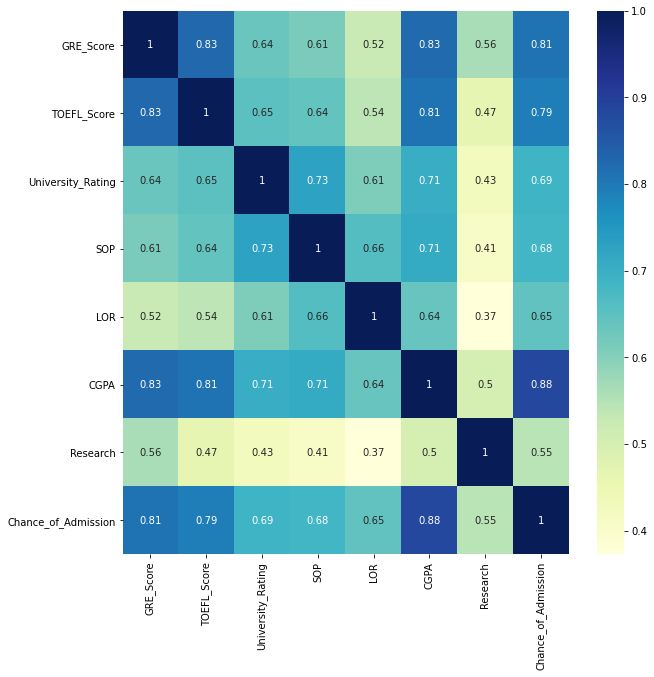

In [10]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(uni_df.corr(), cmap='YlGnBu', annot=True)

### 2. Preparing data

In [29]:
x = uni_df.drop(columns=['Chance_of_Admission'])
y = uni_df['Chance_of_Admission']

In [30]:
x.shape

(1000, 7)

In [31]:
y.shape

(1000,)

In [32]:
x = np.array(x)
y = np.array(y)

In [33]:
y = y.reshape(-1,1)
y.shape

(1000, 1)

In [34]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.25)

In [35]:
print('x_train {0}, y_train {1}, x_test {2}, y_test{3}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train (750, 7), y_train (750, 1), x_test (250, 7), y_test(250, 1)


In [36]:
x_train

array([[304.  ,  97.  ,   2.  , ...,   2.  ,   7.64,   0.  ],
       [320.  , 110.  ,   2.  , ...,   3.5 ,   8.56,   0.  ],
       [326.  , 116.  ,   3.  , ...,   4.  ,   9.14,   1.  ],
       ...,
       [295.  ,  99.  ,   2.  , ...,   3.  ,   7.65,   0.  ],
       [318.  , 106.  ,   3.  , ...,   3.  ,   8.65,   0.  ],
       [339.  , 114.  ,   5.  , ...,   4.5 ,   9.76,   1.  ]])

### 3. Build the model and predict

In [42]:
model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=100)

In [44]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
result =  model.score(x_test, y_test)
print('Accuracy: {}'.format(result))

Accuracy: 0.8928947762838024


In [47]:
y_predict = model.predict(x_test)
y_predict

array([0.7614762 , 0.69285154, 0.95929205, 0.48811957, 0.6926199 ,
       0.9018467 , 0.7446085 , 0.89681804, 0.72160375, 0.7620127 ,
       0.59328586, 0.5775829 , 0.70857114, 0.5062479 , 0.735486  ,
       0.8048927 , 0.55786383, 0.6576928 , 0.67353237, 0.64553875,
       0.91909295, 0.60056156, 0.7110224 , 0.69809896, 0.8048927 ,
       0.5493316 , 0.46355093, 0.48811957, 0.90957505, 0.6483032 ,
       0.73158586, 0.81078666, 0.63612527, 0.84052175, 0.7701674 ,
       0.5475243 , 0.8376031 , 0.7387509 , 0.71354246, 0.67881715,
       0.8067221 , 0.86485976, 0.720484  , 0.69901127, 0.48842934,
       0.78805685, 0.6787877 , 0.71680504, 0.72184634, 0.74048233,
       0.7946867 , 0.9392131 , 0.93579954, 0.69494295, 0.929535  ,
       0.7116582 , 0.5727314 , 0.71603334, 0.5673613 , 0.9398752 ,
       0.6176163 , 0.74998045, 0.7867243 , 0.67220974, 0.83358777,
       0.4558207 , 0.6378664 , 0.77152735, 0.5757706 , 0.91909295,
       0.7800265 , 0.9199973 , 0.64576566, 0.906519  , 0.67956

In [24]:
# It show show % of variation in y is explained by the variation in x.
# check the model accuracy using the test data
regression_model_sklearn_accuracy = regression_model_sklearn.score(x_test, y_test)
regression_model_sklearn_accuracy

0.6852784886276153

In [25]:
y_predict = regression_model_sklearn.predict(x_test)
y_predict

array([16459.47163418, 41463.28469704, 45995.96873167, 60867.62662159,
       37788.96111089, 12691.40985112, 30745.39431961, 28871.37119661,
       40364.8105224 , 27846.03765441, 12345.90946127, 55872.72945711,
       51901.26468871, 19899.43099642, 33543.14460144, 25034.31365816,
       15270.52252492, 13894.83644898, 17151.83643263, 27264.76399784,
       37998.94158036, 28689.22548371, 18857.22977297, 13361.27153442,
       35242.18600695, 29489.22615221, 32253.91977179, 18084.48789779,
       37012.77352863, 31487.6968077 , 29007.84511645, 34612.70300596,
       52419.03059267, 55827.63552139, 30010.65404102,  6884.117184  ,
       19820.95119066, 20106.4315184 , 33530.64122815, 35473.36622955,
       24293.52507041, 34769.13169953, 31487.6968077 , 18881.51562617,
       52158.44454451, 37855.70313601, 67764.90446892, 22369.8612585 ,
       28473.51407797, 10334.57880974, 37655.99809951, 23781.26211275,
       12020.59143977, 35232.36391497, 39557.42212138, 23516.57870791,
      

### 4. Model metrics

In [51]:
# calculating metrics
k = x_test.shape[1] # number of independent variables
n = len(x_test) 
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-( (1-r2)*(n-1) / (n-k-1))

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.047 
MSE = 0.002243191926782521 
MAE = 0.02990382293224335 
R2 = 0.8928947762838024 
Adjusted R2 = 0.889796691300276


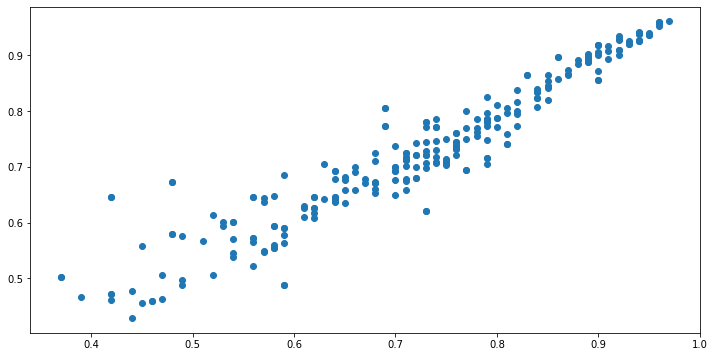

In [52]:
# how accurate predictions are relative to y_test?
plt.figure(figsize = (12, 6))
plt.scatter(y_test, y_predict)